In [49]:
import numpy as np
import pandas as pd    ##importing the libraries
import matplotlib.pyplot as plt

In [50]:
data=pd.read_csv("D:\csvfiles\Advertising.csv") ###importing the datasets

In [51]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [53]:
data=data.iloc[:,1:5] ##removing the unwanted columns

In [54]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [55]:
data.info()  ##the data we containing is numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [56]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [57]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [58]:
###no null values

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

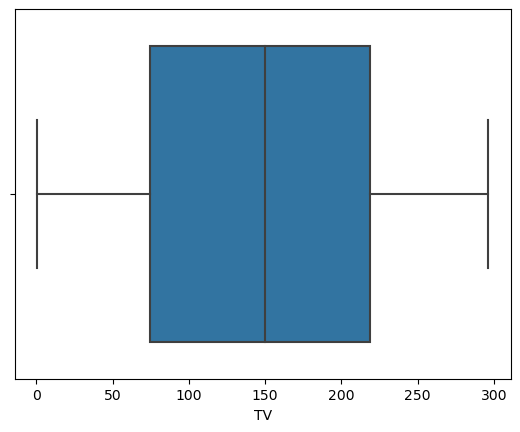

In [59]:
import seaborn as sns
sns.boxplot(data['TV'])  ##checking of outliers

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Radio'>

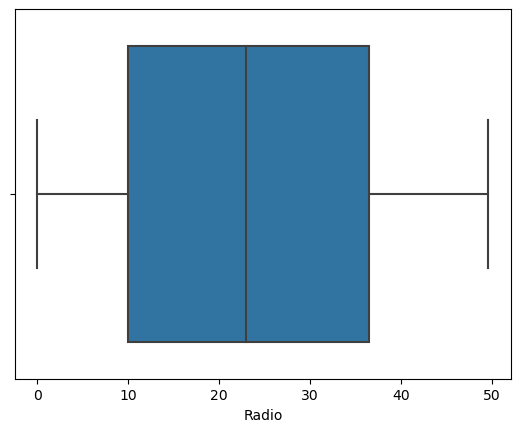

In [60]:
sns.boxplot(data['Radio'])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

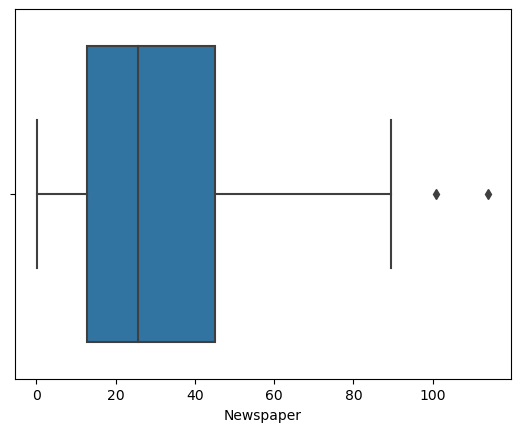

In [61]:
sns.boxplot(data['Newspaper'])

In [62]:
q1=data['Newspaper'].quantile(0.25)
q3=data['Newspaper'].quantile(0.75)
iqr=q3-q1
lower_bond=q1-1.5*iqr
upper_bond=1.5*iqr+q3
def Imputation(values):
    if values > upper_bond:
        return upper_bond
    elif values < lower_bond:
        return lower_bond
    else:
        return values

In [63]:
data['Newspaper']=data['Newspaper'].apply(Imputation)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

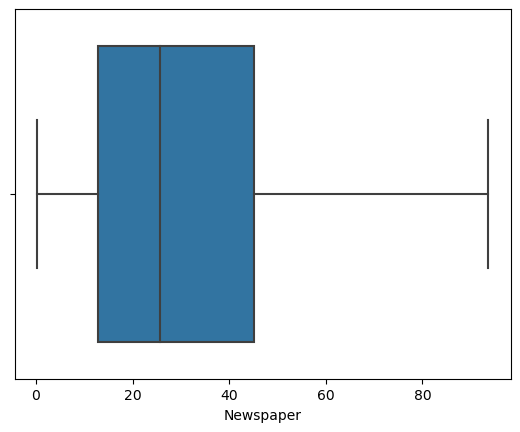

In [64]:
sns.boxplot(data['Newspaper'])

In [65]:
##removed the outliers 

In [66]:
## feature selection 

In [67]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.059325,0.782224
Radio,0.054809,1.000000,0.355953,0.576223
Newspaper,0.059325,0.355953,1.000000,0.231432
Sales,0.782224,0.576223,0.231432,1.000000


here we can see that TV is contributing the maximum after that radio and than newspaper

since we didnt have more dimensions we are not performing any dimensionality reduction techniques

In [68]:
##here i am random forest to check the future sales prediction

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [71]:
x=data.iloc[:,0:3]

In [72]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [73]:
y=data['Sales']

In [74]:
from sklearn.datasets import make_regression

In [75]:
x,y=make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [76]:
cls=RandomForestRegressor(max_depth=2, random_state=0)   ##building the random forest model

In [77]:
cls.fit(x,y)

RandomForestRegressor(max_depth=2, random_state=0)

In [78]:
y_pred=cls.predict(x)   ##prediction with test data

In [79]:
from sklearn.metrics import r2_score  ##finding r-square value

In [80]:
score=r2_score(y,y_pred)

In [81]:
score=round(score,2)*100

In [83]:
print(score)  ##r-square value is 84%

84.0


In [84]:
##multiple regression

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2) ##dividing the data into training and testing data

In [87]:
from sklearn.linear_model import LinearRegression ##importing the linear regression

In [88]:
model=LinearRegression()

In [89]:
model.fit(x_train,y_train) ##fitting the training data

LinearRegression()

In [90]:
y_pred=model.predict(x_test)  ##prediction using model

In [92]:
score=r2_score(y_test,y_pred) 

In [93]:
score=score*100

In [96]:
print(score)  ##score=100

100.0


In [98]:
print(y_pred,y_test)  ##printing the predicted values vs actual values

[-24.60719319   0.17626991  32.59386934 -54.23600024 -40.02555297
 -13.81361736  14.08815923 -42.5262156  -70.00907918  49.82290745
 -18.84474658 -29.85246699  10.99216958 -12.73102933  14.44189199
  23.60700003  -2.08694047   8.76446094 -40.341885   -19.3463247 ] [-24.60719319   0.17626991  32.59386934 -54.23600024 -40.02555297
 -13.81361736  14.08815923 -42.5262156  -70.00907918  49.82290745
 -18.84474658 -29.85246699  10.99216958 -12.73102933  14.44189199
  23.60700003  -2.08694047   8.76446094 -40.341885   -19.3463247 ]


Text(0.5, 1.0, 'predicted values')

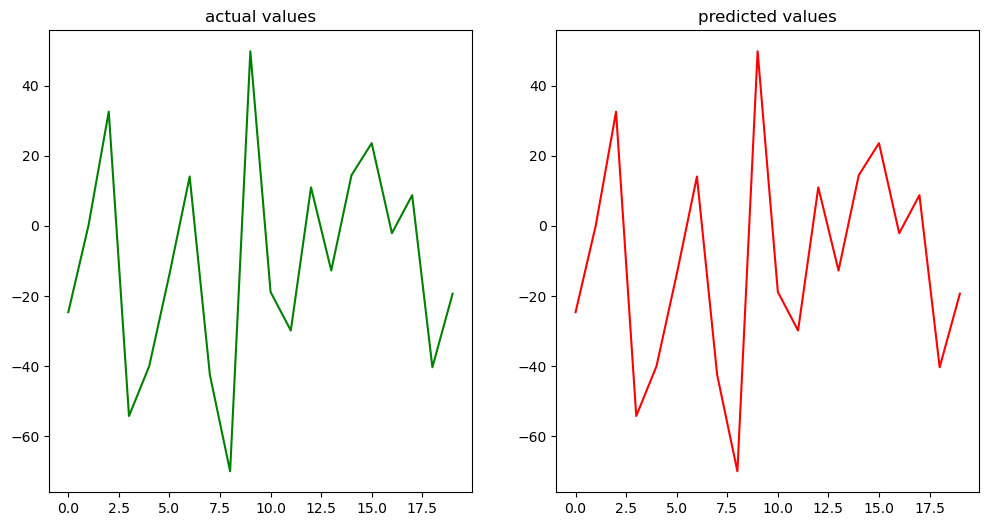

In [113]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_test,color="green")
plt.title("actual values")                           ##plotting the values

plt.subplot(1,2,2)
plt.plot(y_test,color="red")
plt.title("predicted values")